In [1]:
import pandas as pd
import numpy as np

# visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression

sns.set_style("whitegrid")

In [2]:
# read the database from the computer 
ltc_df=pd.read_hdf("ltc_df.h5",key='ltc_df')

In [3]:
# to expand the number of columns and rows that we can see while dispalying a datafram
pd.set_option('display.max_columns', ltc_df.columns.shape[0]+1)
pd.set_option('display.max_rows', 200)

# Visualizaion 

### Relationships between comorbidities 
By using a corrolatin table to see the relationship between the comorbidities. 

In [4]:
# Search and find the columns whose names have 2_years. Because only comobrbiditis have the 2_year.
cmrbd_list_col=[]
two_y="2_years"
for col in ltc_df.columns:
    if col.find(two_y) != -1:
        cmrbd_list_col=cmrbd_list_col+[col]


# Also add the adverse outcome to the table.        
cmrbd_df=ltc_df[cmrbd_list_col]
cmrbd_df=cmrbd_df.iloc[: , :-2]
cmrbd_df['died_within_60_days']=ltc_df['died_within_60_days']
cmrbd_df['any_icu_admit_within_60_days']=ltc_df['any_icu_admit_within_60_days']
cmrbd_df['any_hospital_admits_within_60d']=ltc_df['any_hospital_admits_within_60d']
cmrbd_df['any_ventilations_within_60_days']=ltc_df['any_ventilations_within_60_days']

# Removing the "_2_years_full" and "_within_60d" and "_within_60_days" 
# from the table of the comorbidities to simplfiy the lables and make them shorter while visualizing them 
cmrbd_df = cmrbd_df.rename(mapper=lambda x: x.strip().replace('_2_years_full', '').lower(), axis=1)
cmrbd_df = cmrbd_df.rename(mapper=lambda x: x.strip().replace('_within_60d', '').lower(), axis=1)
cmrbd_df = cmrbd_df.rename(mapper=lambda x: x.strip().replace('_within_60_days', '').lower(), axis=1)

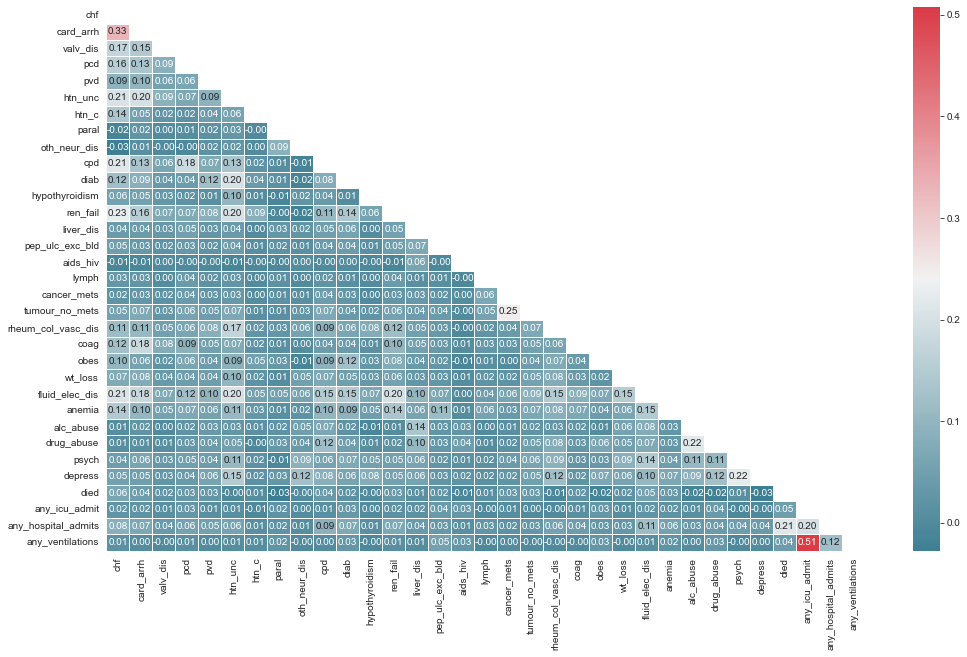

In [5]:
# form the corrolation matrix
corr = cmrbd_df.corr()
# adjust the size of the figure 
fig, ax = plt.subplots(figsize=(17, 10))

# we would like to have a color palette from blue which is under to the red which is over 
colormap = sns.diverging_palette(220, 10, as_cmap = True)

# form a matirx with all the values of zero with the size of corr matrix
dropvals = np.zeros_like(corr)

# Return the indices for the upper-triangle of arr and then fill the values in the dropvals with true
dropvals[np.triu_indices_from(dropvals)] = True

# pass the upper-triangle of matrix as the mask to the heatmap.  
sns.heatmap(corr, cmap = colormap, linewidths = .8, annot = True, fmt = ".2f", mask = dropvals)

plt.show()

## Testing corrolation between comorbidities by Implementing VIF (Variance Inflation Factor)

resources: 

https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python


http://onlinehelp.ihs.com/Energy/AnalyticsExplorer/AE_6.0/Webhelp/content/analyticsexplorer/VIF.htm#:~:text=Small%20VIF%20values%2C%20VIF%20%3C%203,less%20than%2010%20is%20acceptable.

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking an independent variable and regressing it against every other predictor in the model.

Small VIF values, VIF < 3, indicate low correlation among variables under ideal conditions. The default VIF cutoff value is 5; only variables with a VIF less than 5 will be included in the model. However, note that many sources say that a VIF of less than 10 is acceptable.


In [6]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})


# An infinite VIF value indicates that the corresponding variable may be expressed 
# exactly by a linear combination of other variables (which show an infinite VIF as well).
features_=cmrbd_df.columns
df_vif=calculate_vif(df=cmrbd_df, features=features_)
df_vif

,VIF,Tolerance
chf,1.282871,0.779501
card_arrh,1.203070,0.831207
valv_dis,1.049189,0.953117
pcd,1.075407,0.929880
pvd,1.041987,0.959705
htn_unc,1.183327,0.845075
htn_c,1.025941,0.974715
paral,1.016743,0.983532
oth_neur_dis,1.037674,0.963694
cpd,1.120991,0.892068


### Relationships between Outcomes 
By using a corrolatin table to see the relationship between the outcomes. 

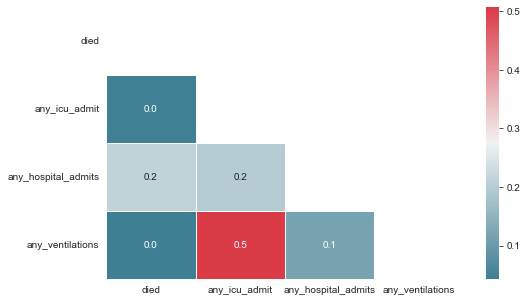

In [7]:
# form the corr matrix for the outcomes
corr = cmrbd_df.iloc[:,-4:].corr()
# adjust the size of the figure 
fig, ax = plt.subplots(figsize=(8, 5))
# we would like to have a color palette from blue which is under to the red which is over 
colormap = sns.diverging_palette(220, 10, as_cmap = True)
# form a matirx with all the values of zero with the size of corr matrix
dropvals = np.zeros_like(corr)
# Return the indices for the upper-triangle of arr and then fill the values in the dropvals with true
dropvals[np.triu_indices_from(dropvals)] = True
# pass the upper-triangle of matrix as the mask to the heatmap.  
sns.heatmap(corr, cmap = colormap, linewidths = .5, annot = True, fmt = ".1f", mask = dropvals)
plt.show()

### lmplot is a 2D scatterplot with an optional overlaid regression line. This is useful for comparing numeric variables

By this plot we can zoom in a bit to the point where we can see the relationship between the procedures in one year and the number of elixhauser comorbidities in two years. There are 6 different part which is stratified by gender, year and whether or not they died. 

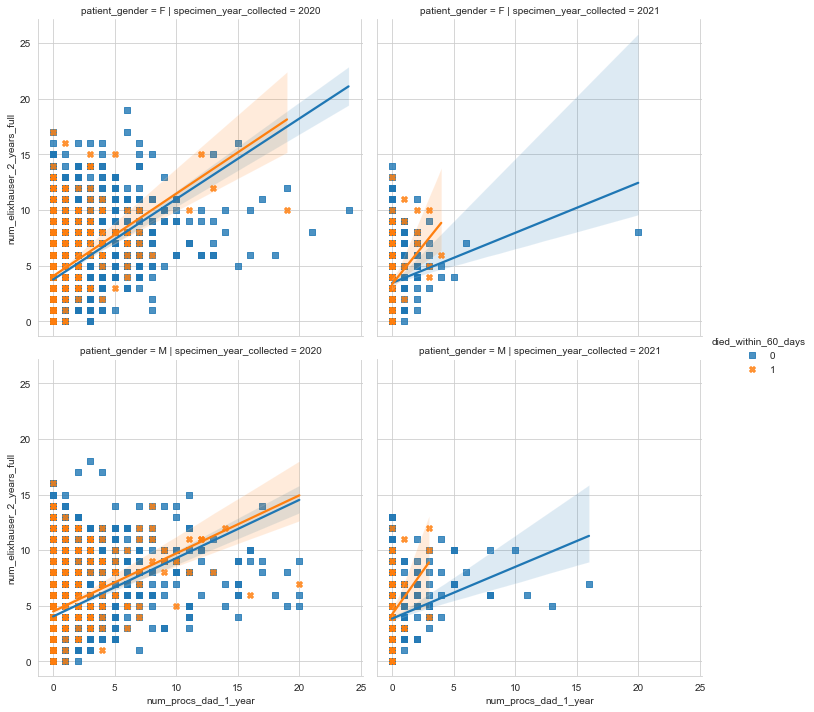

<Figure size 432x288 with 0 Axes>

In [8]:

sns.lmplot(

        data=ltc_df,
        x='num_procs_dad_1_year',
        y='num_elixhauser_2_years_full',
        col='specimen_year_collected',
        row='patient_gender',
        markers=['s','X'],
        order=1,
        hue='died_within_60_days', 
        # logistic=True
            
            )

plt.show()
plt.clf()

## Frequencies for comorbidity and stratification
by using a countplot to visualize the comorbidities

In [9]:
## Build the new table for keeping the varaibles and values of the melting 
# we will keep all the comorbidites but the elix hauser index and category 
df_cmbd_melt = ltc_df[cmrbd_list_col[:-2]]
# we will remove the '_2_years_full' from the comorbidites' name 
df_cmbd_melt = df_cmbd_melt.rename(mapper=lambda x: x.strip().replace('_2_years_full', '').lower(), axis=1)
# melt the table to have the comorbidites as the variable 
df_cmbd_melt = df_cmbd_melt.melt()
# remove the ones with zero values
df_cmbd_melt = df_cmbd_melt[df_cmbd_melt["value"] != 0]

Text(0.5, 0, 'Frequency')

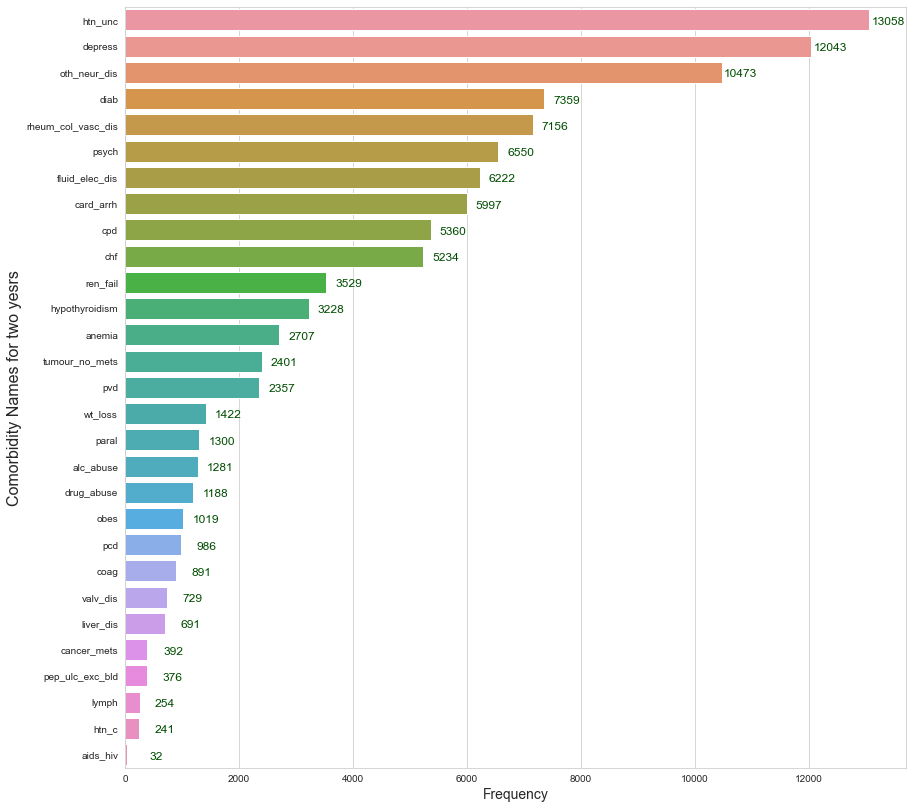

In [10]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# ordering the comorbidities based on the value counts ( the ones with higher frequency comes first)
order = df_cmbd_melt['variable'].value_counts().head(100).index

# drae the countplot in which the y is specified and order i clarified 
ax=sns.countplot(data=df_cmbd_melt, y='variable', order=order)

# for printing the total for each pipe, we will iterate through the ax.patches
for p in ax.patches:
    # as the figure is hirizontal, we will print the width of each p in the ax.patches 
    ax.annotate(int(p.get_width()),
                # positional argument: 'xy' for each annotation 
                ((p.get_x() + p.get_width())+10, p.get_y()), 
                # we can change the x and y for each text 
                xytext=(35, -15),
                # specify the font 
                fontsize=12,
                # specify the color 
                color='#004d00',
                # To put the text in the relative position 
                textcoords='offset points', 
                # the alignment for the annotaion
                horizontalalignment='right')

# in case we want to rotate the ys we can use the following command
# plt.yticks(rotation=75)

# having the x and y labels and specify the font sizes
plt.ylabel('Comorbidity Names for two yesrs', fontsize=16)
plt.xlabel('Frequency', fontsize=14)

# in case we want to save the visualizaion in the format of eps
# plt.savefig('vis.eps', format='eps')

### Stratify the frequency of the comorbidities based on the Gender

In [11]:
# add the gender to the comorbidity framework(eliminiate the elix index and elix category)
df_cmbd_sex_melt = ltc_df[cmrbd_list_col[:-2]+['patient_gender']]

# correct the names of comorbidities and eliminate the '_2_years_full'
df_cmbd_sex_melt = df_cmbd_sex_melt.rename(mapper=lambda x: x.strip().replace('_2_years_full', '').lower(), axis=1)

# melt the table to have the comorbidities as the varaiables and also keep the gender as a column 
df_cmbd_sex_melt = df_cmbd_sex_melt.melt(id_vars=['patient_gender'])
# keep the values of one for each variable(comorbidity) and eliminate the 'U' for gender
df_cmbd_sex_melt = df_cmbd_sex_melt[(df_cmbd_sex_melt["value"] != 0) & ((df_cmbd_sex_melt["patient_gender"] != 'U'))]


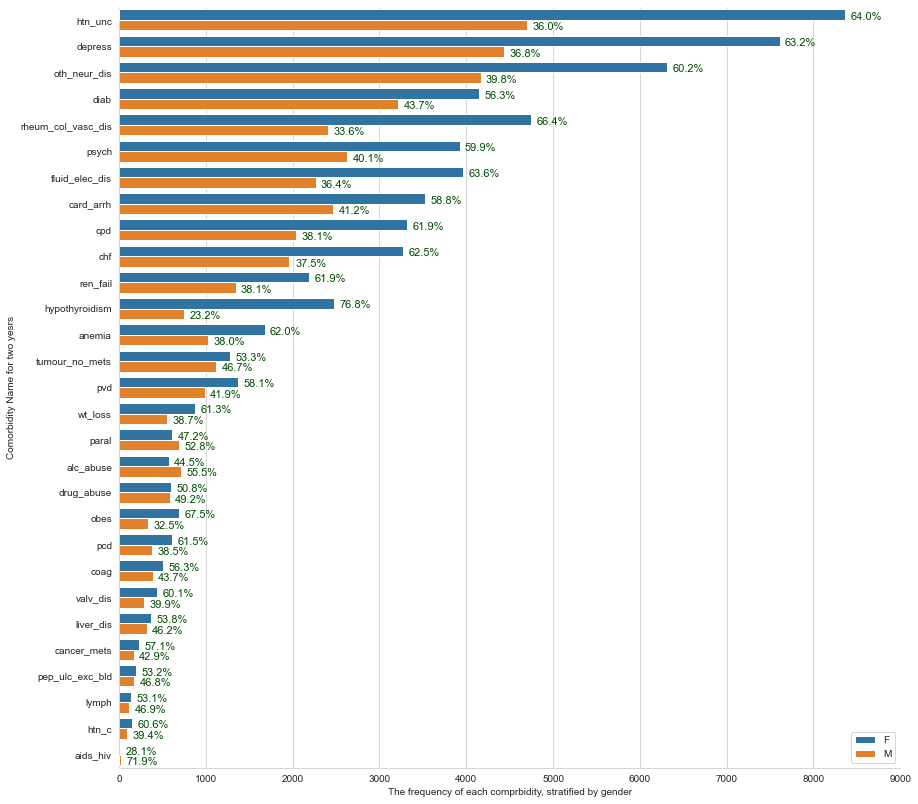

In [12]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# define the oreder based on the highest frequency or count
order = df_cmbd_sex_melt['variable'].value_counts().head(50).index

# Hue the frequencies based on the gender 
ax=sns.countplot(data=df_cmbd_sex_melt, y='variable', order=order,hue='patient_gender')

# specifying the percentage for each sex for each comorbidities 
# for each comorbidity the total will be counted 
total=df_cmbd_sex_melt['variable'].value_counts()
i=0

# iterate thorugh each bar
for p in ax.patches:
    # calculate the percentage 
    ax.annotate("{:.1f}%".format(p.get_width()*100/total[i]),
        # xy position 
        ((p.get_x() + p.get_width())+20, p.get_y()), 
        # specify the position, relatively       
        xytext=(35, -10),textcoords='offset points', horizontalalignment='right',
        # font size and color         
        fontsize=11,color='#004d00')
    i +=1
    # the first bars (for female) for each comorbidity will be printed and 
    # then the adjucent bars (for the male) will be printed. So, we need to reset the i to zero for the male bars.
    if i==len(total):
        i=0



# Add a legend and informative axis label
# F and M in the figure
ax.legend(ncol=1, loc="lower right", frameon=True)
# label and specify the limitation
ax.set(xlim=(0, 9000), ylabel="Comorbidity Name for two yesrs",  xlabel="The frequency of each comprbidity, stratified by gender")
# Remove the top and right spines from plot(s).
sns.despine(trim=True)

### Stratify the frequency of the comorbidities based on the Min and max of the age 

In [13]:
# adding the age to the comorbiditeis and also remove the elix index and cat
df_cmbd_age_melt = ltc_df[cmrbd_list_col[:-2]+['spec_pat_num_age']]
# remove the '_2_years_full'
df_cmbd_age_melt = df_cmbd_age_melt.rename(mapper=lambda x: x.strip().replace('_2_years_full', '').lower(), axis=1)
# melt the dataframe but keep the age as a column 
df_cmbd_age_melt = df_cmbd_age_melt.melt(id_vars=['spec_pat_num_age'])
# remove the vlue of zero 
df_cmbd_age_melt = df_cmbd_age_melt[df_cmbd_age_melt["value"] != 0]

In [14]:
# group the tabel with the comorbidites
g=df_cmbd_age_melt.groupby(['variable'])
# aggregate based on the count of the comorbidity and min and max of the age 
agg=g.agg({
    'variable':['count'],
    'spec_pat_num_age':[min,max],
})
# sort the comorbidities based on the frequency of them 
agg=agg.sort_values(by=('variable',  'count'),ascending=False)

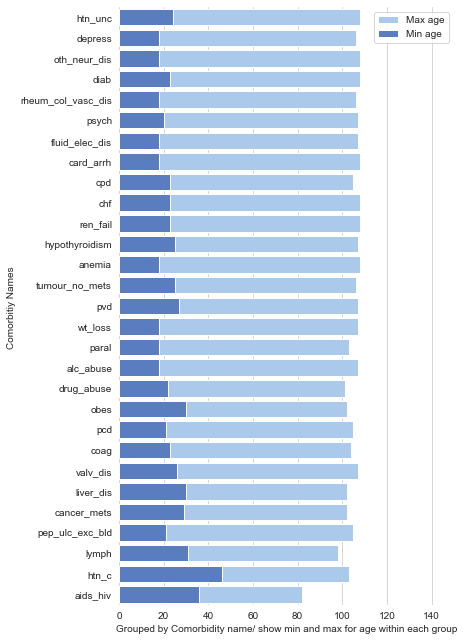

In [15]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 11))

# Load the dataset
df=agg.spec_pat_num_age.reset_index().head(50)

# to show the min and max we plot for each one 
# Plot the Max
# pastel: light
sns.set_color_codes("pastel")
sns.barplot(x="max", y="variable", data=df, label="Max age", color="b")

# Plot the Min
# muted: dark
sns.set_color_codes("muted")
sns.barplot(x="min", y="variable", data=df, label="Min age", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(xlim=(0, 150), ylabel="Comorbitiy Names ", xlabel="Grouped by Comorbidity name/ show min and max for age within each group")
# remove spines from plot(s).
sns.despine(left=True, bottom=True)

### The frequncy of the comorbidities by outcomes
### 1- DEATH outcome

In [16]:
# add the outcome to the comorbidity framework(eliminiate the elix index and elix category)
outcome_list=['any_ventilations_within_60_days','died_within_60_days','any_hospital_admits_within_60d','any_icu_admit_within_60_days']

df_cmbd_out_melt = ltc_df[cmrbd_list_col[:-2]+outcome_list]

# correct the names of comorbidities and eliminate the '_2_years_full'
df_cmbd_out_melt = df_cmbd_out_melt.rename(mapper=lambda x: x.strip().replace('_2_years_full', '').lower(), axis=1)

# melt the table to have the comorbidities as the varaiables and also keep the gender as a column 
df_cmbd_out_melt = df_cmbd_out_melt.melt(id_vars=outcome_list)

# change the name of outcome 
df_cmbd_out_melt=df_cmbd_out_melt.rename(columns={'any_ventilations_within_60_days': 'ventilations', 
                                      'died_within_60_days': 'died',
                                      'any_hospital_admits_within_60d':'hospital_admits',
                                      'any_icu_admit_within_60_days':'icu_admit'
                                     })
# keep the values of one for each variable(comorbidity) and eliminate the 'U' for gender
df_cmbd_out_melt = df_cmbd_out_melt[(df_cmbd_out_melt["value"] != 0)]


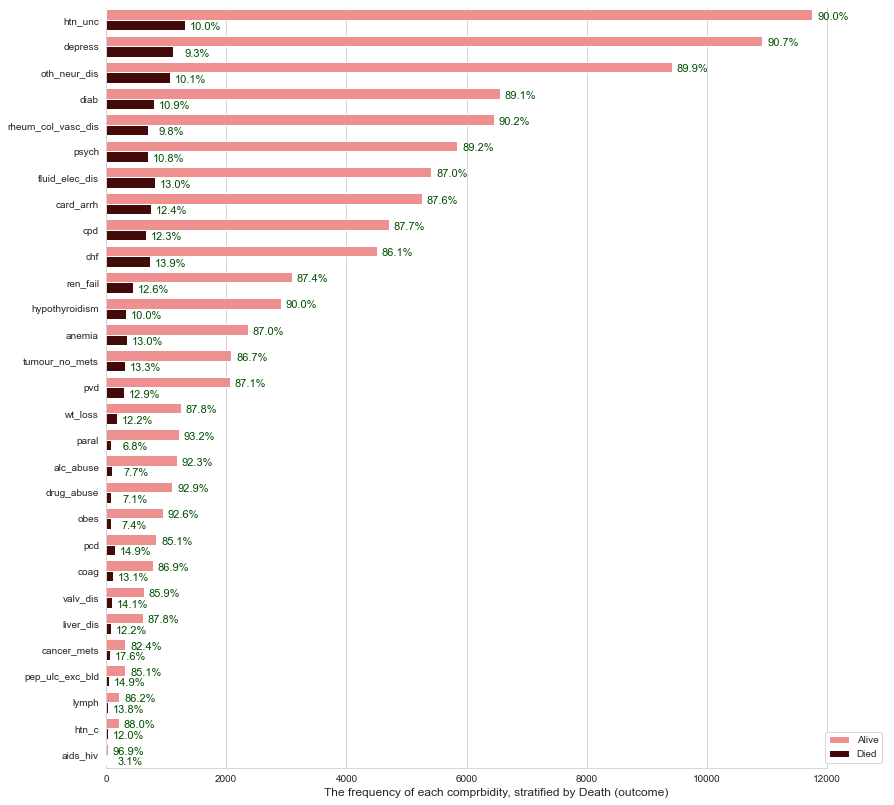

In [17]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# define the oreder based on the highest frequency or count
order = df_cmbd_out_melt['variable'].value_counts().head(50).index

# Hue the frequencies based on the gender 
ax=sns.countplot(data=df_cmbd_out_melt, y='variable', order=order,hue='died', palette=['#ff8080',"#4d0000"])

# specifying the percentage for each sex for each comorbidities 
# for each comorbidity the total will be counted 
total=df_cmbd_sex_melt['variable'].value_counts()
i=0

# iterate thorugh each bar
for p in ax.patches:
    # calculate the percentage 
    ax.annotate("{:.1f}%".format(p.get_width()*100/total[i]),
        # xy position 
        ((p.get_x() + p.get_width())+20, p.get_y()), 
        # specify the position, relatively       
        xytext=(35, -10),textcoords='offset points', horizontalalignment='right',
        # font size and color         
        fontsize=11,color='#004d00')
    i +=1
    # the first bars (for female) for each comorbidity will be printed and 
    # then the adjucent bars (for the male) will be printed. So, we need to reset the i to zero for the male bars.
    if i==len(total):
        i=0



# Add a legend and informative axis label
# F and M in the figure
l=ax.legend(ncol=1, loc="lower right", frameon=True)

# change the name of the labels in the legend
l.get_texts()[0].set_text('Alive')
l.get_texts()[1].set_text('Died')

plt.ylabel('Comorbidity Name for two yesrs', fontsize=12)
plt.xlabel('The frequency of each outcome, stratified by gender', fontsize=12)

# label and specify the limitation
ax.set(xlim=(0, 13000), ylabel="",  xlabel="The frequency of each comprbidity, stratified by Death (outcome)")
# Remove the top and right spines from plot(s).
sns.despine(trim=True)

### 2- HOSPITAL ADMIT OUTCOME

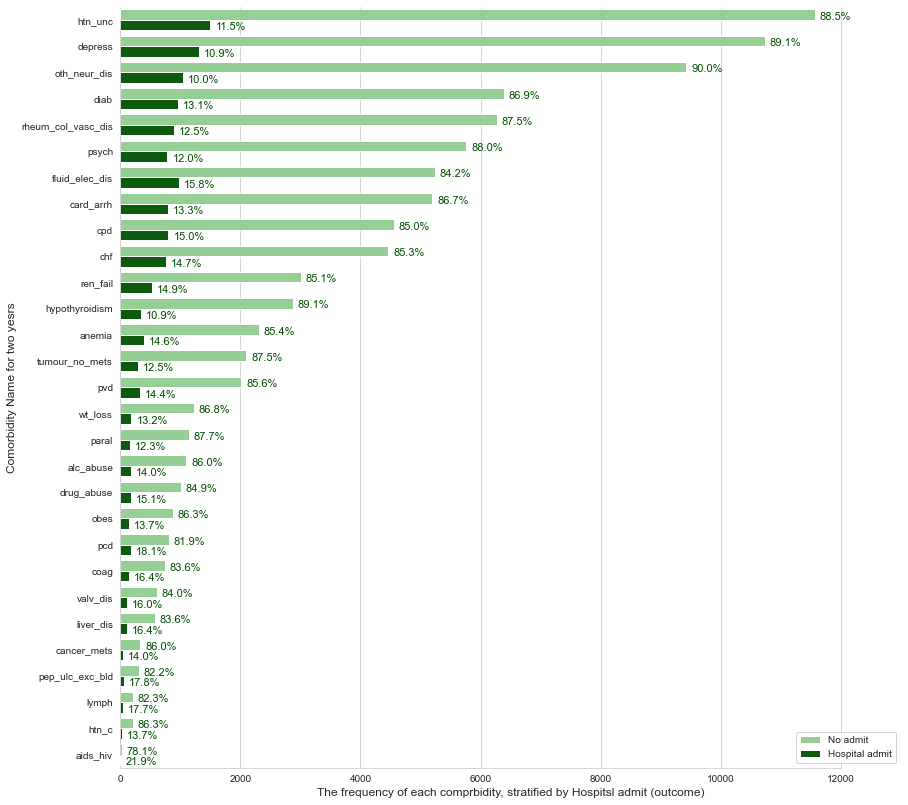

In [18]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# define the oreder based on the highest frequency or count
order = df_cmbd_out_melt['variable'].value_counts().head(50).index

# Hue the frequencies based on the gender 
ax=sns.countplot(data=df_cmbd_out_melt, y='variable', order=order,hue='hospital_admits', palette=['#8cd98c',"#006600"])

# specifying the percentage for each sex for each comorbidities 
# for each comorbidity the total will be counted 
total=df_cmbd_sex_melt['variable'].value_counts()
i=0

# iterate thorugh each bar
for p in ax.patches:
    # calculate the percentage 
    ax.annotate("{:.1f}%".format(p.get_width()*100/total[i]),
        # xy position 
        ((p.get_x() + p.get_width())+20, p.get_y()), 
        # specify the position, relatively       
        xytext=(35, -10),textcoords='offset points', horizontalalignment='right',
        # font size and color         
        fontsize=11,color='#004d00')
    i +=1
    # the first bars (for female) for each comorbidity will be printed and 
    # then the adjucent bars (for the male) will be printed. So, we need to reset the i to zero for the male bars.
    if i==len(total):
        i=0



# Add a legend and informative axis label
# F and M in the figure
l=ax.legend(ncol=1, loc="lower right", frameon=True)

# change the name of the labels in the legend
l.get_texts()[0].set_text('No admit')
l.get_texts()[1].set_text('Hospital admit')

plt.ylabel('Comorbidity Name for two yesrs', fontsize=12)
plt.xlabel('The frequency of each comprbidity, stratified by Hospitsl admit (outcome)', fontsize=12)

# label and specify the limitation
ax.set(xlim=(0, 13000))
# Remove the top and right spines from plot(s).
sns.despine(trim=True)

### 3- ICU ADMIT outcome

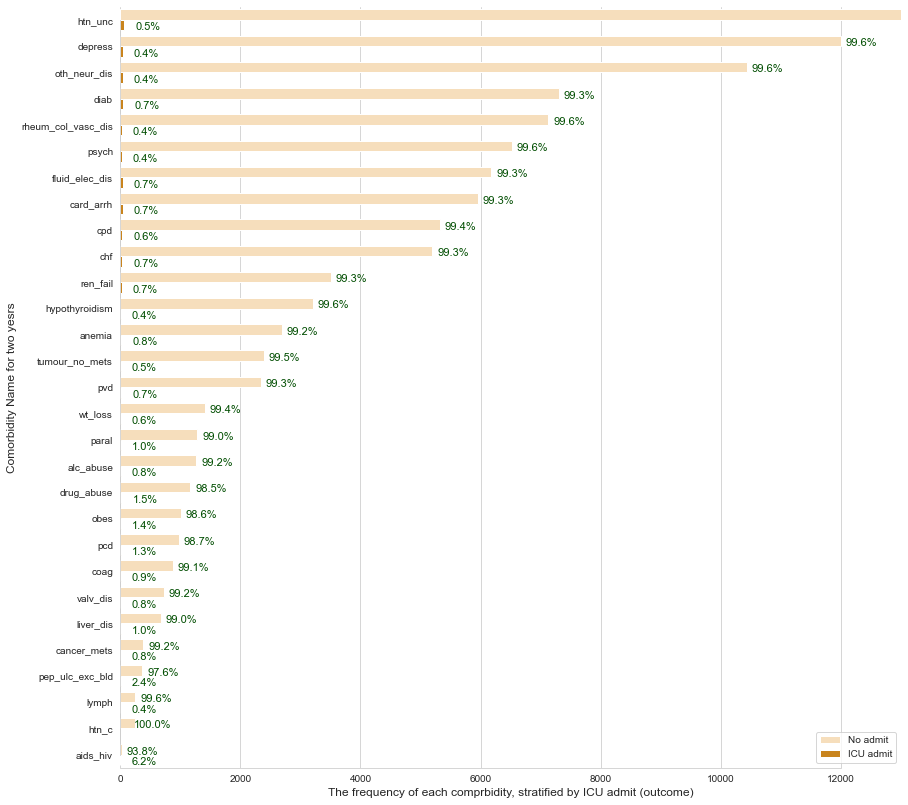

In [19]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# define the oreder based on the highest frequency or count
order = df_cmbd_out_melt['variable'].value_counts().head(50).index

# Hue the frequencies based on the gender 
ax=sns.countplot(data=df_cmbd_out_melt, y='variable', order=order,hue='icu_admit', palette=['#ffe0b3',"#e68a00"])

# specifying the percentage for each sex for each comorbidities 
# for each comorbidity the total will be counted 
total=df_cmbd_sex_melt['variable'].value_counts()
i=0

# iterate thorugh each bar
for p in ax.patches:
    # calculate the percentage 
    ax.annotate("{:.1f}%".format(p.get_width()*100/total[i]),
        # xy position 
        ((p.get_x() + p.get_width())+20, p.get_y()), 
        # specify the position, relatively       
        xytext=(35, -10),textcoords='offset points', horizontalalignment='right',
        # font size and color         
        fontsize=11,color='#004d00')
    i +=1
    # the first bars (for female) for each comorbidity will be printed and 
    # then the adjucent bars (for the male) will be printed. So, we need to reset the i to zero for the male bars.
    if i==len(total):
        i=0



# Add a legend and informative axis label
# F and M in the figure
l=ax.legend(ncol=1, loc="lower right", frameon=True)

# change the name of the labels in the legend
l.get_texts()[0].set_text('No admit')
l.get_texts()[1].set_text('ICU admit')

plt.ylabel('Comorbidity Name for two yesrs', fontsize=12)
plt.xlabel('The frequency of each comprbidity, stratified by ICU admit (outcome)', fontsize=12)

# label and specify the limitation
ax.set(xlim=(0, 13000))
# Remove the top and right spines from plot(s).
sns.despine(trim=True)

### 4- VENTILATIONS outcome

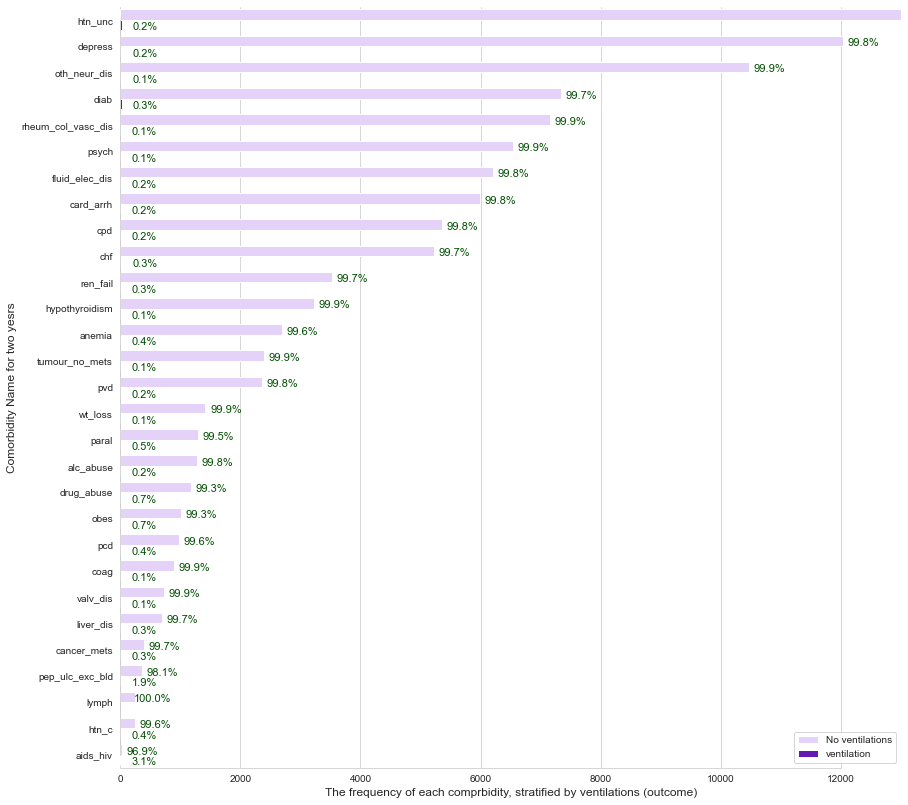

In [20]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))

# define the oreder based on the highest frequency or count
order = df_cmbd_out_melt['variable'].value_counts().head(50).index

# Hue the frequencies based on the gender 
ax=sns.countplot(data=df_cmbd_out_melt, y='variable', order=order,hue='ventilations', palette=['#e5ccff',"#6300cc"])

# specifying the percentage for each sex for each comorbidities 
# for each comorbidity the total will be counted 
total=df_cmbd_sex_melt['variable'].value_counts()
i=0

# iterate thorugh each bar
for p in ax.patches:
    # calculate the percentage 
    ax.annotate("{:.1f}%".format(p.get_width()*100/total[i]),
        # xy position 
        ((p.get_x() + p.get_width())+20, p.get_y()), 
        # specify the position, relatively       
        xytext=(35, -10),textcoords='offset points', horizontalalignment='right',
        # font size and color         
        fontsize=11,color='#004d00')
    i +=1
    # the first bars (for female) for each comorbidity will be printed and 
    # then the adjucent bars (for the male) will be printed. So, we need to reset the i to zero for the male bars.
    if i==len(total):
        i=0



# Add a legend and informative axis label
# F and M in the figure
l=ax.legend(ncol=1, loc="lower right", frameon=True)

# change the name of the labels in the legend
l.get_texts()[0].set_text('No ventilations')
l.get_texts()[1].set_text('ventilation')

plt.ylabel('Comorbidity Name for two yesrs', fontsize=12)
plt.xlabel('The frequency of each comprbidity, stratified by ventilations (outcome)', fontsize=12)

# label and specify the limitation
ax.set(xlim=(0, 13000))
# Remove the top and right spines from plot(s).
sns.despine(trim=True)

### Frequency for Adverseoutcomes

In [21]:
# select and list the outcomes 
outcome_list=['any_ventilations_within_60_days','died_within_60_days','any_hospital_admits_within_60d','any_icu_admit_within_60_days']

# change the name of outcome 
outcome_df=ltc_df[outcome_list]
outcome_df=outcome_df.rename(columns={'any_ventilations_within_60_days': 'ventilations', 
                                      'died_within_60_days': 'died',
                                      'any_hospital_admits_within_60d':'hospital_admits',
                                      'any_icu_admit_within_60_days':'icu_admit'
                                     })

# melt them to have each outcome as the variables and value (0 or 1) of each 
outcome_df=outcome_df.melt()
# remove the ones with zero values 
outcome_df=outcome_df[outcome_df['value']!=0]


Text(0.5, 0, 'Frequency')

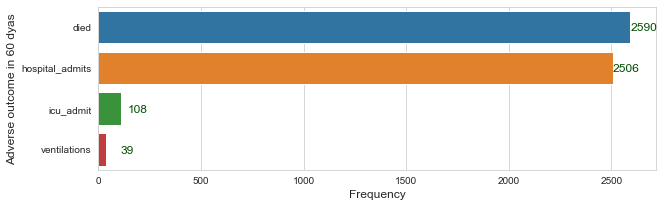

In [22]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 3))

# order based on the frequency
order = outcome_df['variable'].value_counts().head(100).index
ax=sns.countplot(data=outcome_df, y='variable', order=order)

# show the total number of each outcome in the bar
for p in ax.patches:
    ax.annotate(int(p.get_width()),
                ((p.get_x() + p.get_width())+10, p.get_y()), 
                xytext=(25, -20),
                fontsize=12,
                color='#004d00',
                textcoords='offset points', 
                horizontalalignment='right')


plt.ylabel('Adverse outcome in 60 dyas', fontsize=12)
plt.xlabel('Frequency', fontsize=12)
# plt.savefig('vis.eps', format='eps')

### Stratify the frequency of the outcomes based on  gender

In [23]:
# select the adverse outcome and age 
outcome_df_bysex=ltc_df[outcome_list+['patient_gender']]

# change the name of outcome 
outcome_df_bysex=outcome_df_bysex.rename(columns={'any_ventilations_within_60_days': 'ventilations', 
                                      'died_within_60_days': 'died',
                                      'any_hospital_admits_within_60d':'hospital_admits',
                                      'any_icu_admit_within_60_days':'icu_admit'
                                     })
# melt the columns but keep the age
outcome_df_bysex=outcome_df_bysex.melt(id_vars=['patient_gender'])
# remove the zero values and unidentified gender 
outcome_df_bysex=outcome_df_bysex[(outcome_df_bysex['value']!=0) & (outcome_df_bysex['patient_gender']!='U')]

In [24]:
# group by the gender and outcomes 
g=outcome_df_bysex.groupby(['patient_gender','variable'])
# aggregate based on each comorbidity and count the frecquncy of each  based on gender 
agg=g.agg({
    'variable':['count'],
    
})
# sort based on the frequency 
agg=agg.sort_values(by=('variable',  'count'),ascending=False)

# unstack will add up the variables (comorbidties) and then move the comorbidities to the column and the gender as the index
# by trainsposing we will have the F and M as the columns and the indexes will be the comorbidities 
agg_outcome_df_bysex=agg.unstack().T



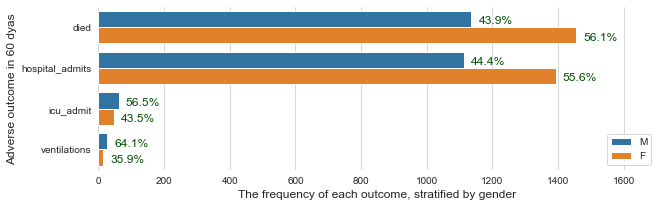

In [25]:
# this figure is like the previous ones, the explanation is the same 
f, ax = plt.subplots(figsize=(10, 3))


order = outcome_df_bysex['variable'].value_counts().head(50).index
ax=sns.countplot(data=outcome_df_bysex, y='variable', order=order, hue='patient_gender' )
    
total=outcome_df_bysex['variable'].value_counts()

i=0
for p in ax.patches:


    ax.annotate(
        "{:.1f}%".format(p.get_width()*100/total[i]),
        ((p.get_x() + p.get_width())+20, p.get_y()), 
        xytext=(35, -13),
        fontsize=12,
        color='#004d00',
        textcoords='offset points', 
        horizontalalignment='right')
    i +=1
    if i==len(total):
        i=0

plt.ylabel('Adverse outcome in 60 dyas', fontsize=12)
plt.xlabel('The frequency of each outcome, stratified by gender', fontsize=12)

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 1700))
sns.despine(left=True, bottom=True)

### Stratify the frequency of the outcomes based on the Min and max of the age

In [26]:
# change the name of outcome 
outcome_df_byage=ltc_df[outcome_list+['spec_pat_num_age']]
outcome_df_byage=outcome_df_byage.rename(columns={'any_ventilations_within_60_days': 'ventilations', 
                                      'died_within_60_days': 'died',
                                      'any_hospital_admits_within_60d':'hospital_admits',
                                      'any_icu_admit_within_60_days':'icu_admit'
                                     })

outcome_df_byage=outcome_df_byage.melt(id_vars=['spec_pat_num_age'])
outcome_df_byage=outcome_df_byage[(outcome_df_byage['value']!=0) ]

In [27]:
g=outcome_df_byage.groupby(['variable'])
agg=g.agg({
    
    'variable':['count'],
    'spec_pat_num_age':[min,max],
    
})
agg=agg.sort_values(by=('variable',  'count'),ascending=False)
agg_outcome_df_byage=agg.unstack().T

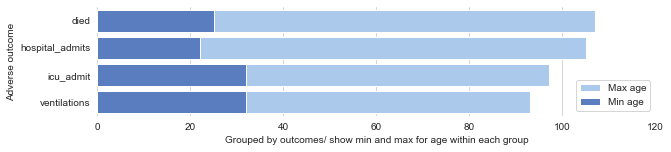

In [28]:
f, ax = plt.subplots(figsize=(10, 2))

# Load the dataset
df=agg.spec_pat_num_age.reset_index().head(50)


# Plot the Max
sns.set_color_codes("pastel")
sns.barplot(x="max", y="variable", data=df, label="Max age", color="b")

# Plot the Min
sns.set_color_codes("muted")
sns.barplot(x="min", y="variable", data=df, label="Min age", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 120), ylabel="Adverse outcome", xlabel="Grouped by outcomes/ show min and max for age within each group")
sns.despine(left=True, bottom=True)

### Stratify the frequency of the outcomes based on the the covid exposure 

In [29]:
# select the adverse outcome and interp_result 
outcome_df_by_interp_result=ltc_df[outcome_list+['interp_result']]

# change the name of outcome 
outcome_df_by_interp_result=outcome_df_by_interp_result.rename(columns={'any_ventilations_within_60_days': 'ventilations', 
                                      'died_within_60_days': 'died',
                                      'any_hospital_admits_within_60d':'hospital_admits',
                                      'any_icu_admit_within_60_days':'icu_admit'
                                     })
# melt the columns but keep the age
outcome_df_by_interp_result=outcome_df_by_interp_result.melt(id_vars=['interp_result'])
# remove the zero values and unidentified gender 
outcome_df_by_interp_result=outcome_df_by_interp_result[(outcome_df_by_interp_result['value']!=0) & (outcome_df_by_interp_result['interp_result']!='U')]

In [30]:
# group by the gender and outcomes 
g=outcome_df_by_interp_result.groupby(['interp_result','variable'])
# aggregate based on each comorbidity and count the frecquncy of each  based on gender 
agg=g.agg({
    'variable':['count'],
    
})
# sort based on the frequency 
agg=agg.sort_values(by=('variable',  'count'),ascending=False)

# unstack will add up the variables (comorbidties) and then move the comorbidities to the column and the gender as the index
# by trainsposing we will have the F and M as the columns and the indexes will be the comorbidities 
agg_outcome_df_by_interp_result=agg.unstack().T



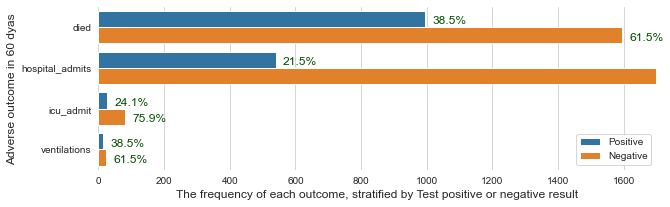

In [31]:
# this figure is like the previous ones, the explanation is the same 
f, ax = plt.subplots(figsize=(10, 3))


order = outcome_df_by_interp_result['variable'].value_counts().head(50).index
ax=sns.countplot(data=outcome_df_by_interp_result, y='variable', order=order, hue='interp_result' )
    
total=outcome_df_by_interp_result['variable'].value_counts()

i=0
for p in ax.patches:


    ax.annotate(
        "{:.1f}%".format(p.get_width()*100/total[i]),
        ((p.get_x() + p.get_width())+20, p.get_y()), 
        xytext=(35, -13),
        fontsize=12,
        color='#004d00',
        textcoords='offset points', 
        horizontalalignment='right')
    i +=1
    if i==len(total):
        i=0

plt.ylabel('Adverse outcome in 60 dyas', fontsize=12)
plt.xlabel('The frequency of each outcome, stratified by Test positive or negative result', fontsize=12)

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 1700))
sns.despine(left=True, bottom=True)

# Survival analysis 
is a branch of statistics for analyzing the expected duration of time until one event occurs, such as death in biological organisms and failure in mechanical systems

In [32]:
# list of the year and time as the index
time_list=['specimen_year_collected','specimen_month_collected']

# slice the outcomes and the time index from the main table 
time_event_df=ltc_df[outcome_list+time_list]

# change the name of outcome 
time_event_df=time_event_df.rename(columns={'any_ventilations_within_60_days': 'ventilations', 
                                      'died_within_60_days': 'died',
                                      'any_hospital_admits_within_60d':'hospital_admits',
                                      'any_icu_admit_within_60_days':'icu_admit'
                                     })

# group the table based on the index time 
g=time_event_df.groupby(time_list)

# we need the sum of each outcomes based on the time index
agg=g.agg({
    'ventilations':['sum'],
    'died':['sum'],
    'hospital_admits':['sum'],
    'icu_admit':['sum'],
})



In [33]:
# year and month are the index and we need to have them in the table
df_sum_bytime=agg.reset_index()
# create a column as time and insert the year-month in it 
df_sum_bytime['time']=df_sum_bytime[['specimen_year_collected','specimen_month_collected']].apply(lambda x : str(x[0])+"-"+str(x[1]),axis=1 )

# drop the year and month columns
df_sum_bytime=df_sum_bytime.drop(time_list,axis=1)
# melt the outcomes but keep the eime 
df_sum_bytime=df_sum_bytime.melt(id_vars=['time']).drop(['variable_1'],axis=1)
df_sum_bytime=df_sum_bytime.rename(columns={'variable_0':'Outcomes'})


/Users/fuzzysha/software/miniconda3/envs/hproj/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


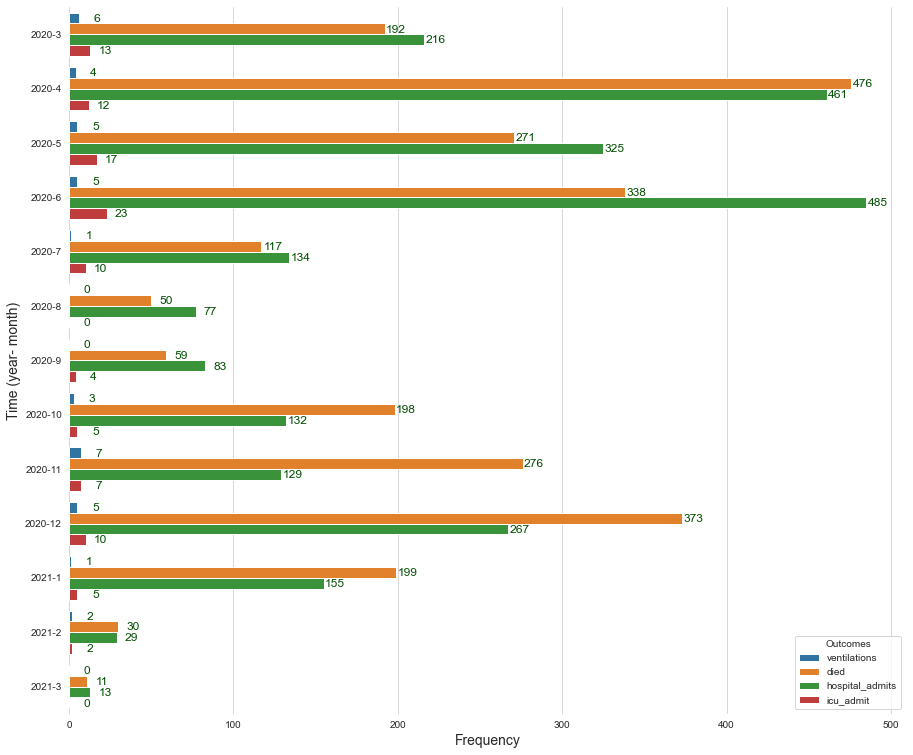

In [34]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))


order = df_sum_bytime['time'].value_counts().head(50).index
ax=sns.barplot(data=df_sum_bytime, x='value', y='time', order=order
                 ,hue='Outcomes'
             )
    
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_width()),
                ((p.get_x() + p.get_width())+10, p.get_y()), 
                xytext=(5, -9),
                fontsize=12,
                color='#004d00',
                textcoords='offset points', 
                horizontalalignment='right')

plt.ylabel('Time (year- month)', fontsize=14)
plt.xlabel('Frequency', fontsize=14)

sns.despine(left=True, bottom=True)

# Based on the following data, we know when each varient of the covid was emerged
resource: https://health-infobase.canada.ca/covid-19/epidemiological-summary-covid-19-cases.html

In [35]:
# read the data for each variant of the covid
variant_df=pd.read_csv("covid19-epiSummary-variants.csv")

# we only need the variant with the collection week of between '2020-03' and '2021-04'
variant_df=variant_df[(variant_df['Collection (week)']>='2020-03') &(variant_df['Collection (week)']<'2021-04')]

# delete some variants that have no effect on the database 
variant_df.drop(variant_df[variant_df['_Identifier']=='Omicron'].index, inplace=True)
variant_df.drop(variant_df[variant_df['_Identifier']=='Mu'].index, inplace=True)
variant_df.drop(variant_df[variant_df['_Identifier']=='B.1.617.3'].index, inplace=True)

In [36]:
# group them based on the identifier and aggregated them based on the min and the max of the collection week.
# then sort them based on the frequency of the identifier
agg= variant_df.groupby('_Identifier').agg({
'Collection (week)':['min','max','count']
}).reset_index().sort_values(by=('Collection (week)','min'))



In [37]:
agg

_Identifier Collection (week)                  
                            min         max count
8       Other        2020-03-01  2021-03-28  2721
0       Alpha        2020-04-05  2021-03-28    49
3       Delta        2020-10-25  2021-03-28     8
2        Beta        2020-12-13  2021-03-28    27
4         Eta        2020-12-13  2021-03-28    15
5       Gamma        2021-01-10  2021-03-28    25
6        Iota        2021-01-17  2021-03-28     6
1   B.1.1.318        2021-01-31  2021-03-28    25
9       Theta        2021-02-07  2021-03-07     2
7      Lambda        2021-02-14  2021-03-28     6